In [1]:
%env MNE_USE_NUMBA false

env: MNE_USE_NUMBA=false


In [2]:
import mne

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import json

In [19]:
! ls ../../data/ds003517-download/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-01_eeg.fdt

../../data/ds003517-download/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-01_eeg.fdt


In [243]:
file_path = '../../data/ds003517-download/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-02_eeg.set'

In [244]:
raw = mne.io.read_raw_eeglab(file_path, eog='auto', preload=True)

Reading /home/noomkcalb/Documents/projects/game-emotions/video-server/notebooks/../../data/ds003517-download/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt
Reading 0 ... 1398674  =      0.000 ...  2797.348 secs...


</home/noomkcalb/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-404>:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.


In [245]:
raw.annotations

<Annotations | 4070 segments: S 90 (1382), S 91 (247), S 92 (150), S 93 ...>

# Restore raw signal

In [246]:
def get_raw_signal(signal_df, ch_names, ch_types, sampling_freq):
    signal_df.columns = ch_names

    # signal_df["time"] = pd.to_datetime(signal_df["time"]).dt.strftime("%Y-%m-%d %H:%M:%S")
#     signal_df["time"] = pd.to_datetime(signal_df["timestamp"], unit='ms')
    
    signal_info = mne.create_info(
        ch_names, 
        ch_types=ch_types, 
        sfreq=sampling_freq
    )
    signal_info.set_montage('standard_1020')
#     signal_info["start_time"] = signal_df["time"].min()
    
    data = signal_df[ch_names].values.T
    raw = mne.io.RawArray(data, signal_info)

#     # Filter line noise
    raw.notch_filter(50, notch_widths=3)

#     # Filter nessesary frequencies
    raw.filter(1, 50)
    
    return raw

In [247]:
# raw = get_raw_signal(
#     signal_df,
#     ch_names=ch_names,
#     ch_types=ch_types,
#     sampling_freq=sampling_freq
# )

In [248]:
import matplotlib

In [249]:
matplotlib.use('QtAgg')

In [250]:
%matplotlib Qt

In [251]:
raw.notch_filter(50, notch_widths=3)

Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.75 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 52.25 Hz)
- Filter length: 3301 samples (6.602 sec)



<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~693.7 MB, data loaded>

In [252]:
raw.filter(1, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (3.302 sec)



<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~693.7 MB, data loaded>

In [253]:
# raw.pick(['Fp1', 'Fp2']).plot(scalings={'eeg': 5e-6}, duration=60)

In [254]:
raw.times.max() / 60

46.62246666666667

In [255]:
raw_data, time = raw[0, 1000:-100]

In [256]:
plt.figure(figsize=(20, 7))

plt.plot(time, raw_data[0])

# plt.ylim(-100, 100)

# Find artifacts

In [257]:
ica = mne.preprocessing.ICA()

In [22]:
ica.fit(epochs)

NameError: name 'epochs' is not defined

In [ ]:
ica.get_components()

In [ ]:
sources = ica.get_sources(epochs)

In [137]:
sources_data = sources.pick([0, 1]).get_data()

In [138]:
plt.plot(sources_data[0][1])
plt.show()

# Hilbert transform

In [258]:
%matplotlib inline

In [259]:
rhythms = {
    'theta': (4, 8), 
    'alpha': (8, 14), 
    'beta': (15, 30)
}

In [260]:
start_time = 40
end_time = 40 + 8

In [261]:
start_time // 60, start_time % 60

(0, 40)

In [262]:
fs = int(raw.info['sfreq'])

In [263]:
# selected_events = events_df[
#     events_df['type'] == 'Close eyes'
# ]['start_sec'].astype(int).tolist()

In [264]:
selected_channels = 'Fp1, AF7, AF3, F7, F5, F3, FT7, FC5, FC3, FC1'.split(', ')

In [265]:
selected_channels

['Fp1', 'AF7', 'AF3', 'F7', 'F5', 'F3', 'FT7', 'FC5', 'FC3', 'FC1']

In [266]:
from scipy.signal import hilbert

In [375]:
list(raw.annotations)

[OrderedDict([('onset', 0.0),
              ('duration', 0.0),
              ('description', 'boundary'),
              ('orig_time', None)]),
 OrderedDict([('onset', 90.44),
              ('duration', 0.002),
              ('description', 'S100'),
              ('orig_time', None)]),
 OrderedDict([('onset', 91.758),
              ('duration', 0.002),
              ('description', 'S 90'),
              ('orig_time', None)]),
 OrderedDict([('onset', 92.11),
              ('duration', 0.002),
              ('description', 'S 97'),
              ('orig_time', None)]),
 OrderedDict([('onset', 94.466),
              ('duration', 0.002),
              ('description', 'S 90'),
              ('orig_time', None)]),
 OrderedDict([('onset', 94.826),
              ('duration', 0.002),
              ('description', 'S 97'),
              ('orig_time', None)]),
 OrderedDict([('onset', 95.388),
              ('duration', 0.002),
              ('description', 'S 93'),
              ('orig_time', None

In [434]:
channel_data = raw.copy().pick(selected_channels).filter(14, 25).get_data()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 14 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 473 samples (0.946 sec)



In [435]:
channel_data.shape

(10, 1398675)

In [436]:
analytical_signal = hilbert(channel_data)

In [437]:
amplitude_data = np.abs(analytical_signal)

In [438]:
averaged_amplitude_data = amplitude_data.mean(axis=0)

In [439]:
sfreq = raw.info['sfreq']

In [440]:
averaged_amplitude_data = averaged_amplitude_data[int(sfreq) * 90: int(sfreq) * (90 + 560)]

In [441]:
insight_points = averaged_amplitude_data.shape[0] / sfreq * 1 * 1

In [442]:
quantile_insights = insight_points / averaged_amplitude_data.shape[0]

In [443]:
quantile_insights

0.002

In [444]:
level_of_interest = np.quantile(averaged_amplitude_data, 1 - quantile_insights)

Нужно исключить возможность выбора такой квантили, за которой находятся только артефакты.
Пока что добиваемся этого усреднением!

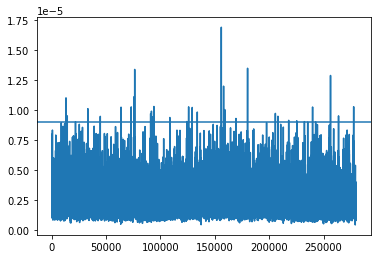

In [445]:
plt.plot(averaged_amplitude_data)
plt.axhline(level_of_interest)

Результат!

Скалирующий фактор можно вынести на интерфейс!

In [446]:
indicator = pd.Series(averaged_amplitude_data > level_of_interest).rolling(int(sfreq) * 10, center=True).mean().fillna(0)

In [447]:
indicator = indicator / indicator.max()

In [448]:
downsample_factor = 10

In [449]:
indicator = indicator[indicator.index % downsample_factor == 0].copy()

In [432]:
# indicator_df = pd.DataFrame()

In [415]:
indicator_df['flow'] = indicator

In [433]:
indicator_df['anxiety'] = indicator

In [450]:
indicator_df['boredom'] = indicator

In [451]:
indicator_df.index = indicator_df.index / sfreq

In [452]:
indicator_df.index.name = 'time'

In [453]:
indicator_df.to_csv('mock-session-indicators.csv')

In [284]:
events_df = pd.read_csv('../../data/ds003517-download/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-02_events.tsv', sep='\t')

In [363]:
processed_events_df = events_df[
    (events_df['onset'] > 90) &\
    (events_df['onset'] < 90 + 560) 
][['onset', 'trial_type']].sample(100).copy()

In [366]:
processed_events_df = processed_events_df.sort_values('onset')

In [368]:
processed_events_df['onset'] = processed_events_df['onset'] - 90

In [369]:
processed_events_df.columns = ['start_sec', 'type']

In [370]:
processed_events_df['end_sec'] = processed_events_df['start_sec'] + 0.1

In [371]:
processed_events_df[['start_sec', 'end_sec', 'type']].to_csv('mock-session-events.csv')

In [314]:
processed_events_df['type'].value_counts()

SHOOT_BUTTON          32
COLLECT_STAR          30
MISSILE_HIT_ENEMY     17
PLAYER_CRASH_WALL      8
PLAYER_CRASH_ENEMY     5
STATUS                 4
COLLECT_AMMO           3
GAME OVER              1
Name: type, dtype: int64

In [285]:
events_df['trial_type'].value_counts()

SHOOT_BUTTON          1382
COLLECT_STAR          1228
MISSILE_HIT_ENEMY      766
PLAYER_CRASH_WALL      247
STATUS                 175
PLAYER_CRASH_ENEMY     150
COLLECT_AMMO           117
GAME START               4
GAME OVER                1
Name: trial_type, dtype: int64

In [235]:
raw.annotations

<Annotations | 240 segments: S 20 (1), S 22 (159), S 25 (41), S 29 (1), S ...>

In [48]:
amplitude_data_t = pd.Series(amplitude_data).rolling(250, center=True).max()

In [49]:
amplitude_data_t = pd.Series(amplitude_data > 10).rolling(250, center=True).sum() / 250

In [50]:
# %matplotlib qt

In [53]:
amplitude_data.shape

(14000,)

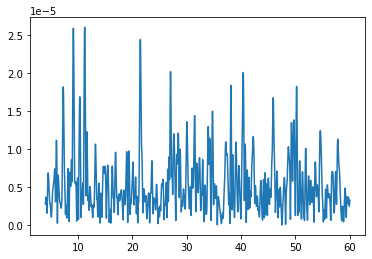

In [51]:
plt.plot(np.linspace(4, 60, amplitude_data.shape[0]), amplitude_data)

In [115]:
plt.plot(np.linspace(4, 60, amplitude_data.shape[0]), amplitude_data_t)

In [124]:
%matplotlib inline

In [163]:
annotations = [
    [18.416, 18.693],
    [18.693, 19.039],
    [20.051, 22.75],
    [22.801, 23.111],
    [22.5, 24.1], # Strange
    [23.37, 23.703],
    [23.98, 28.825],
    [30.35, 32.446],
    [32.603, 33.076],
    [33.076, 34.103],
    [34.185, 34.532],
    [36.063, 38.243],
    [40.875, 41.976],
    [44.757, 45.245],
    [47.891, 49.888],
    [50.302, 51.802],
    [51.996, 55.000],
    [55.887, 56.18],
    [57.5, 57.85],
    [56.416, 57.555]
]

In [164]:
amplitude_data

array([2.69012027, 3.48231513, 3.46082057, ..., 5.88272089, 5.72196853,
       2.27121046])

In [165]:
amplitude_data_modified = amplitude_data.copy()

In [166]:
annotations_indices = [(int(a * 250) - 1000, int(b * 250) - 1000) for a, b in annotations]

In [167]:
for a, b in annotations_indices:
    amplitude_data_modified[a:b] = None

In [168]:
amplitude_data_modified = pd.Series(amplitude_data_modified).dropna().values

In [169]:
%matplotlib qt

In [185]:
np.quantile(amplitude_data_modified, 0.99)

10.746820059081696

Усреднить амплитуду по каналам!

In [176]:
plt.plot(amplitude_data_modified)

In [172]:
plt.hist(amplitude_data_modified)

(array([1088., 2219., 2056., 1348.,  563.,  255.,   73.,   37.,   10.,
          15.]),
 array([1.48696073e-02, 1.62987425e+00, 3.24487889e+00, 4.85988353e+00,
        6.47488816e+00, 8.08989280e+00, 9.70489744e+00, 1.13199021e+01,
        1.29349067e+01, 1.45499114e+01, 1.61649160e+01]),
 <BarContainer object of 10 artists>)

In [170]:
plt.plot(amplitude_data_modified)

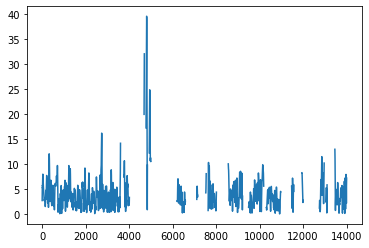

In [149]:
plt.plot(amplitude_data_modified)

<AxesSubplot:ylabel='Frequency'>

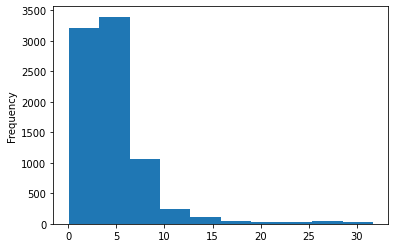

In [101]:
pd.Series(amplitude_data_modified).plot(kind='hist')

In [125]:
amplitude_data[amplitude_data < 15]

array([2.69012027, 3.48231513, 3.46082057, ..., 5.88272089, 5.72196853,
       2.27121046])

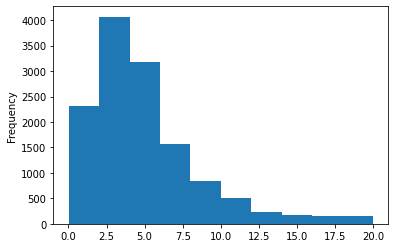

In [126]:
pd.Series(amplitude_data[amplitude_data < 20]).plot(kind='hist')
plt.show()

In [43]:
# events_df

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 413 samples (1.652 sec)



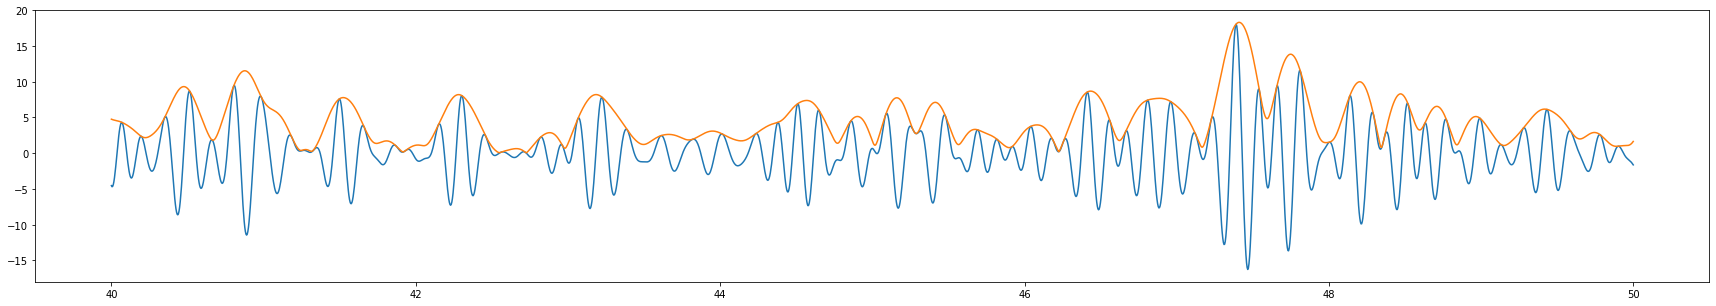

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)



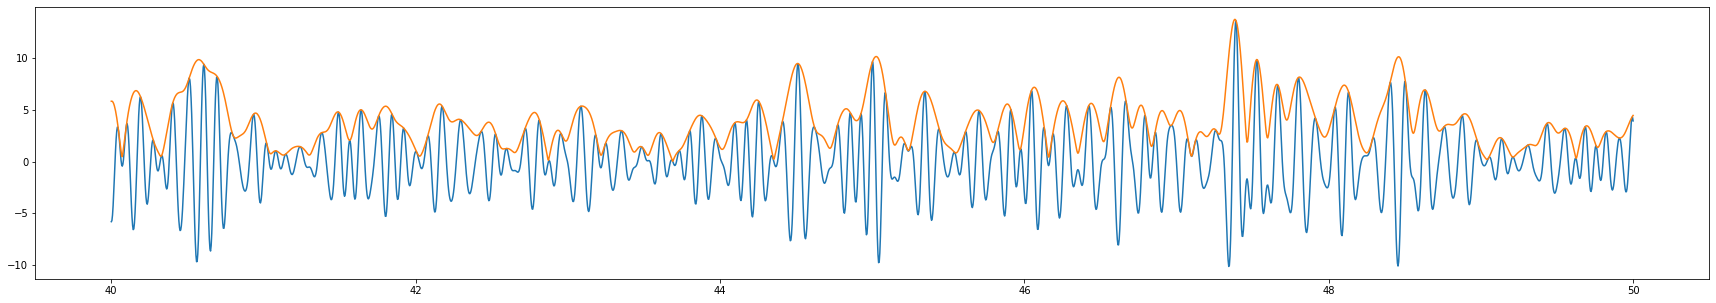

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.884 sec)



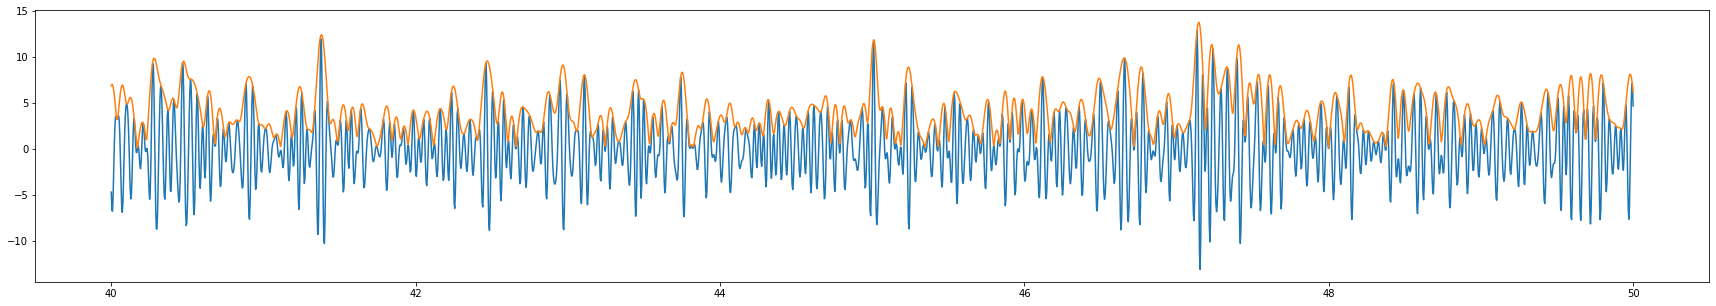

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 413 samples (1.652 sec)



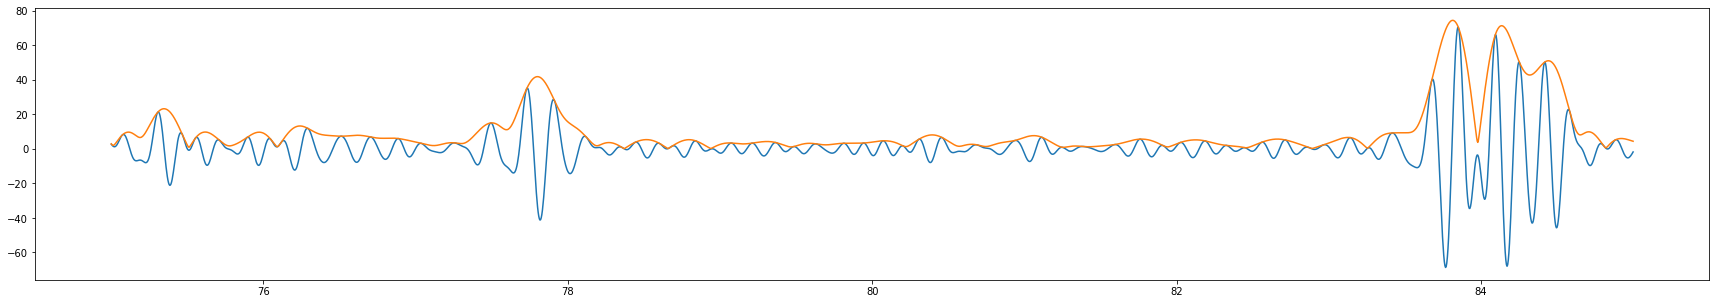

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)



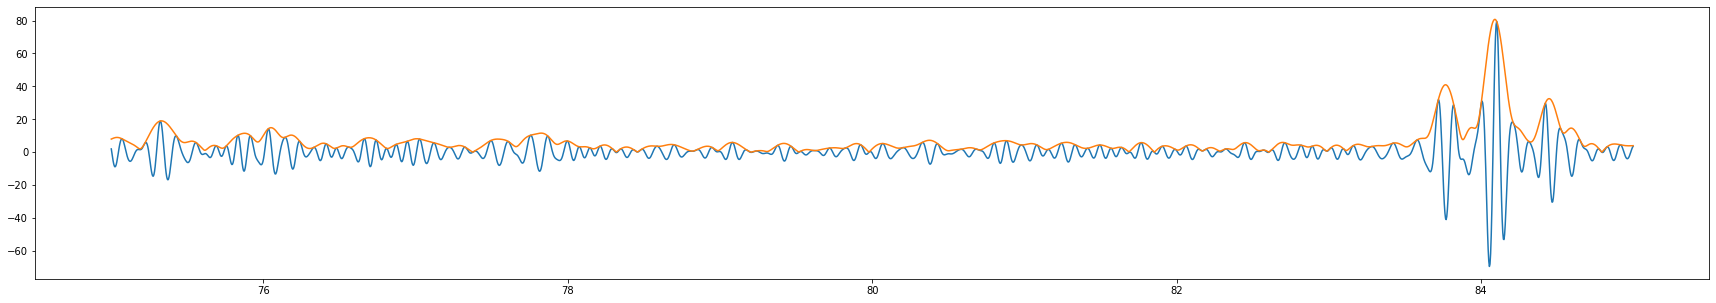

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.884 sec)



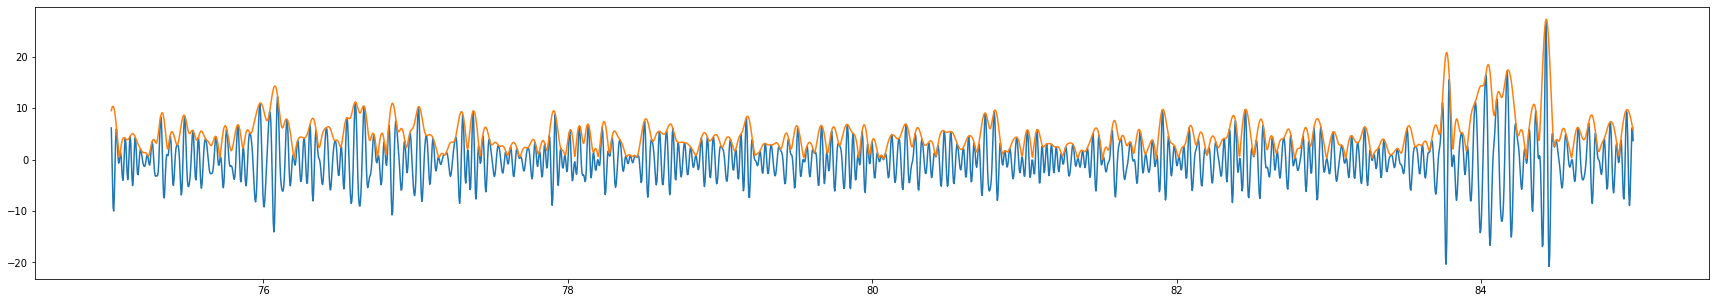

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 413 samples (1.652 sec)



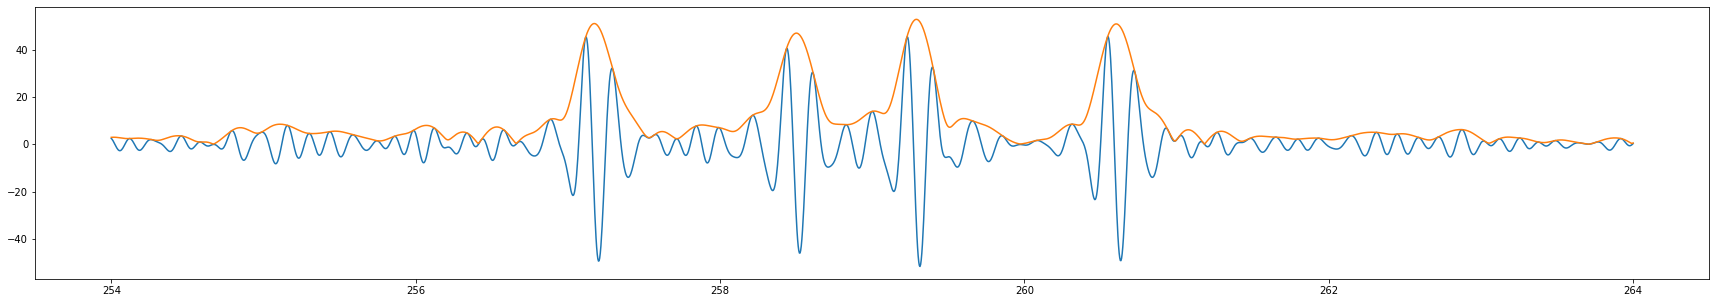

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)



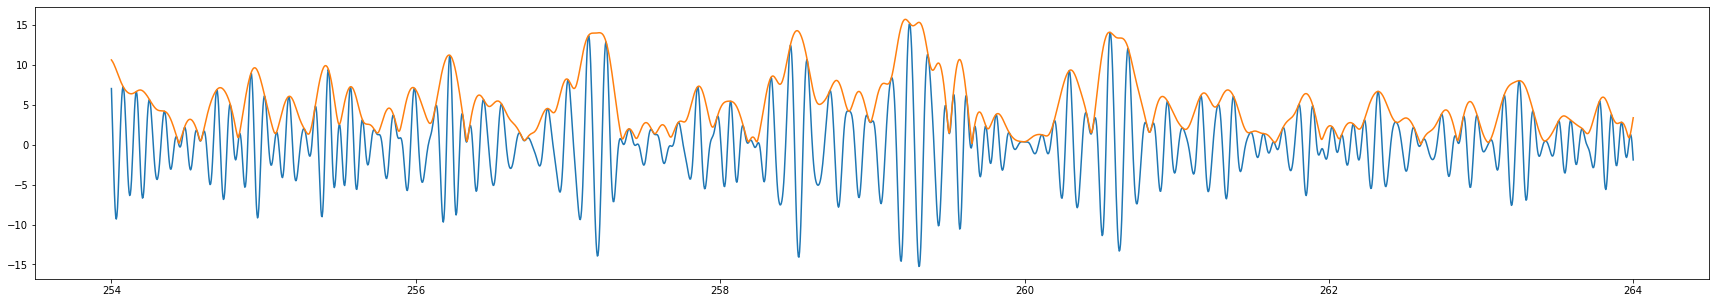

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.884 sec)



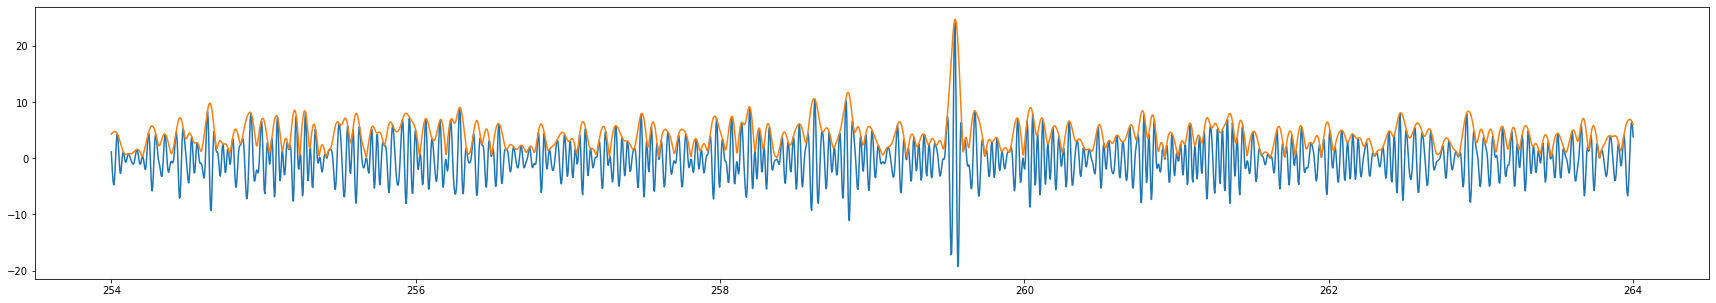

In [44]:
event_outputs = []

for start_time in selected_events:
    end_time = start_time + 10
    
    start_index = start_time * fs
    window = end_time * fs - start_index
    
    outputs = {}
    for rhythm, (start_freq, end_freq) in rhythms.items():
        unfiltered_data = raw.copy().pick(['Fp1']).get_data()[0, 1000:]

        channel_data = raw.copy().pick(['Fp1']).filter(start_freq, end_freq).get_data()[0, 1000:]

        from scipy.signal import hilbert

        analytical_signal = hilbert(channel_data)

        amplitude_data = np.abs(analytical_signal)

        instantaneous_phase = np.unwrap(np.angle(analytical_signal))

        instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)

    #     plt.figure(figsize=(30, 5))
    #     plt.plot(unfiltered_data[start_index:start_index + window])
    #     plt.plot(channel_data[start_index:start_index + window])
    #     plt.plot(amplitude_data[start_index:start_index + window])
    #     plt.plot(instantaneous_frequency[start_index:start_index + window])
    #     plt.show()

        plt.figure(figsize=(30, 5))
        window_time = np.linspace(start_time, end_time, channel_data[start_index:start_index + window].shape[0])
        plt.plot(window_time, channel_data[start_index:start_index + window])
        plt.plot(window_time, amplitude_data[start_index:start_index + window])
        plt.show()

        outputs[rhythm] = amplitude_data[start_index:start_index + window]
        
    event_outputs.append(outputs)

In [84]:
alpha_trials = np.array([e['alpha'] for e in event_outputs])

In [85]:
beta_trials = np.array([e['beta'] for e in event_outputs])

In [87]:
theta_trials = np.array([e['theta'] for e in event_outputs])

In [97]:
window_samples = 250

(2.0, 8.0)

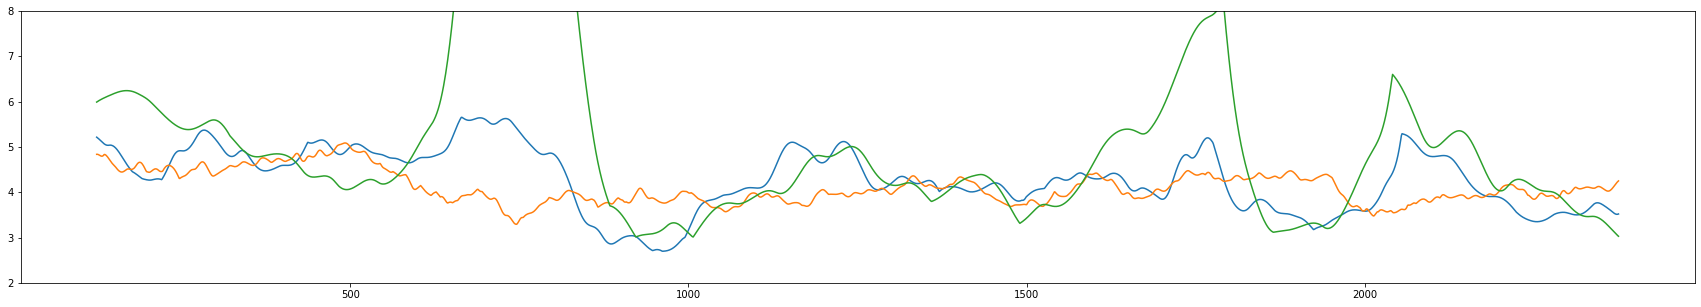

In [99]:
plt.figure(figsize=(30, 5))
ax = plt.gca()

pd.DataFrame(alpha_trials.T).rolling(window_samples, center=True).mean().median(axis=1).plot(ax=ax)
pd.DataFrame(beta_trials.T).rolling(window_samples, center=True).mean().median(axis=1).plot(ax=ax)


pd.DataFrame(theta_trials.T).rolling(window_samples, center=True).mean().median(axis=1).plot(ax=ax)

plt.ylim(2, 8)

In [47]:
window_time = np.linspace(0, 10, 10 * fs)

In [48]:
window_time.shape

(2500,)

In [49]:
trials.shape

(3, 2500)

In [50]:
trials

array([[ 6.84594305,  6.99376928,  6.96026553, ...,  7.41033753,
         6.85108209,  6.15436726],
       [ 9.53141949, 10.04795407, 10.33429223, ...,  6.9341542 ,
         6.33172084,  5.74930013],
       [ 4.34019986,  4.43438116,  4.54775854, ...,  6.54503557,
         6.31325168,  6.03029739]])

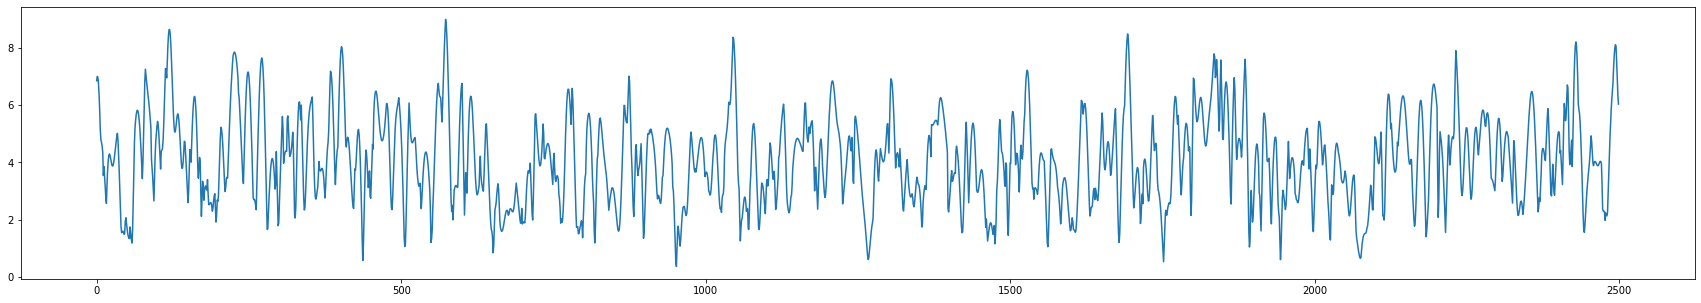

In [51]:
plt.figure(figsize=(30, 5))
plt.plot(np.median(trials, axis=0))

Начать стоит действительно с усреднения сигнала, затем переходить к отдельным попыткам

Сгладить ритмы! Иначе получаются всплески, которые не нужны

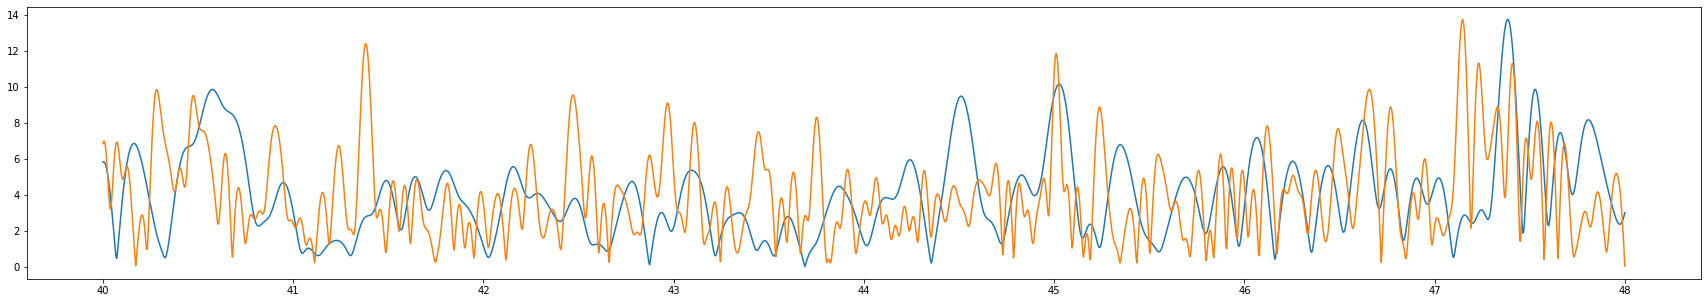

In [64]:
plt.figure(figsize=(30, 5))
plt.plot(window_time, outputs['alpha'])
plt.plot(window_time, outputs['beta'])

In [78]:
indicator = (outputs['alpha'] - outputs['beta']) / (outputs['alpha'] + 1)

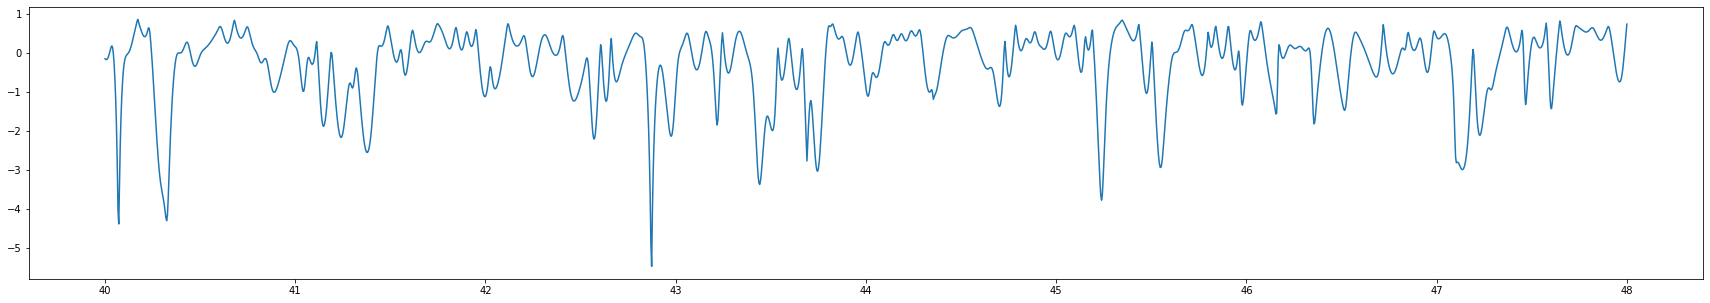

In [79]:
plt.figure(figsize=(30, 5))
# plt.plot(window_time, outputs['alpha'])
plt.plot(window_time, indicator)

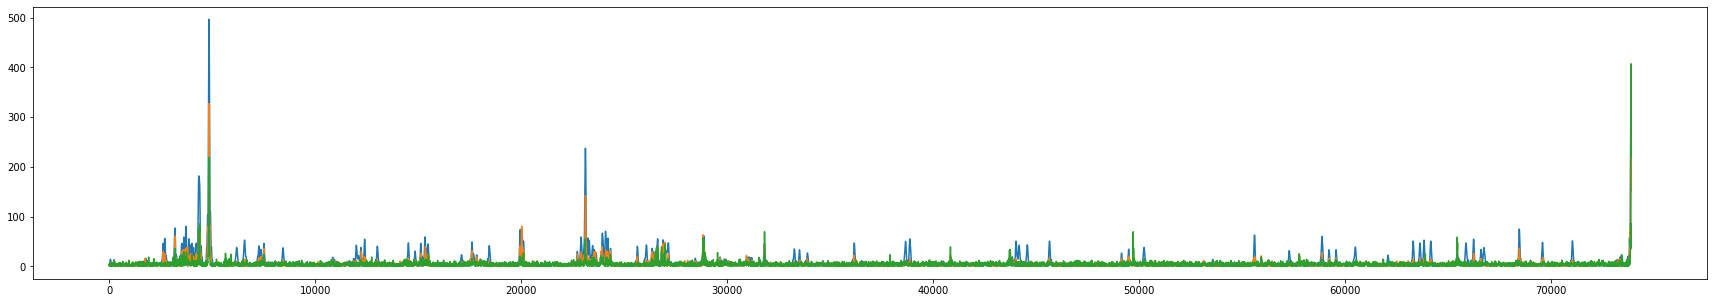

In [153]:
plt.figure(figsize=(30, 5))

for rhythm, amplitude_data in outputs.items():
    plt.plot(amplitude_data)
    
plt.show()

# Самое важное теперь - найти артефакты!

# Get scaleogram

In [27]:
! pip install scipy

In [28]:
from calour.heatmap import plot

In [29]:
import scipy

In [30]:
import seaborn as sns

In [31]:
raw.times.max()

303.472

In [32]:
epochs = mne.Epochs(raw, [[0, 0, 0]], tmin=4, tmax=13, baseline=None, preload=True).pick(['Fp1'])

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 2251 original time points ...
0 bad epochs dropped


In [33]:
frequencies = np.arange(3, 30, 1)

In [34]:
cycles = np.linspace(3, 10, frequencies.shape[0]).astype(int)

In [35]:
a, b = mne.time_frequency.tfr_morlet(epochs, freqs=frequencies, n_cycles=cycles)

In [36]:
scaleogram = np.flip(a.data.squeeze())

In [37]:
plot(scaleogram, vmin=1, vmax=2000)

AttributeError: 'numpy.ndarray' object has no attribute 'heatmap_databases'

In [211]:
plt.figure(figsize=(20, 10))
sns.heatmap(scaleogram, vmin=1, vmax=2000)

<AxesSubplot:>

In [212]:
help(a)

Help on AverageTFR in module mne.time_frequency.tfr object:

class AverageTFR(_BaseTFR)
 |  AverageTFR(info, data, times, freqs, nave, comment=None, method=None, verbose=None)
 |  
 |  Container for Time-Frequency data.
 |  
 |  Can for example store induced power at sensor level or inter-trial
 |  coherence.
 |  
 |  Parameters
 |  ----------
 |  
 |  info : mne.Info
 |      The :class:`mne.Info` object with information about the sensors and methods of measurement.
 |  data : ndarray, shape (n_channels, n_freqs, n_times)
 |      The data.
 |  times : ndarray, shape (n_times,)
 |      The time values in seconds.
 |  freqs : ndarray, shape (n_freqs,)
 |      The frequencies in Hz.
 |  nave : int
 |      The number of averaged TFRs.
 |  comment : str | None, default None
 |      Comment on the data, e.g., the experimental condition.
 |  method : str | None, default None
 |      Comment on the method used to compute the data, e.g., morlet wavelet.
 |  
 |  verbose : bool | str | int | Non

No baseline correction applied


[<Figure size 432x288 with 2 Axes>]

<Figure size 1440x720 with 0 Axes>

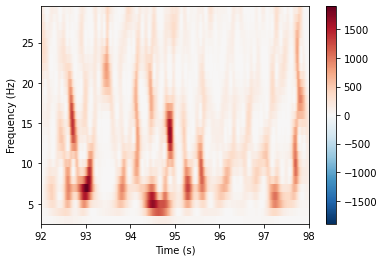

In [190]:
plt.figure(figsize=(20, 10))
a.plot(show=False)

# Get localized bands

In [151]:
def get_sampling_freq_deg_two(n):
    n = int(n)
    d = 0
    while n > 0:
        n = n >> 1
        d += 1
    return 2 ** d

In [152]:
get_sampling_freq_deg_two(250.0)

256

In [153]:
def get_bands(raw, locations_dict, bands_dict, window_size=16):
    sampling_freq = get_sampling_freq_deg_two(raw.info['sfreq'])
    
    location_band_channels = {}
    for location_name, channels in locations_dict.items():
        band_channels = {}
        
        for name, frequencies in bands_dict.items():
            channel_raw = raw.copy().pick(channels).get_data(channels)
            channel_fft = np.abs(
                mne.time_frequency.stft(channel_raw, sampling_freq, window_size)
            )
            # Average all frequencies, then among channels
            band_channel = channel_fft[:, frequencies, :].mean(axis=1).mean(axis=0)
            band_channel = band_channel[window_size:-window_size]
            band_channels[name] = band_channel
        location_band_channels[location_name] = band_channels
    
    return location_band_channels

In [154]:
location_band_channels = get_bands(
    raw, 
    {
        'frontal_left': ['Fp1'],
        'frontal_temporal': ['Fp1']
    }, 
    {
        'alpha': np.arange(8, 15), 
        'beta': np.arange(15, 25),
        'theta': np.arange(4, 8)
    }
)

Number of frequencies: 129
Number of time steps: 2232
Number of frequencies: 129
Number of time steps: 2232
Number of frequencies: 129
Number of time steps: 2232
Number of frequencies: 129
Number of time steps: 2232
Number of frequencies: 129
Number of time steps: 2232
Number of frequencies: 129
Number of time steps: 2232


# Get indicators

Нужно исправить время

In [155]:
def get_flow():
    global location_band_channels
    frontal_left_alpha = location_band_channels['frontal_left']['alpha']
    frontal_left_beta = location_band_channels['frontal_left']['beta']
    
    return frontal_left_beta / frontal_left_alpha - 1

In [156]:
def get_anxiety():
    global location_band_channels
    frontal_left_alpha = location_band_channels['frontal_temporal']['theta']
    frontal_left_beta = location_band_channels['frontal_temporal']['beta']
    
    return frontal_left_beta / frontal_left_alpha - 1

In [157]:
indicators = {
    'flow': get_flow,
    'anxiety': get_anxiety
}

In [158]:
indicators_df = pd.DataFrame()

In [159]:
for indicator, func in indicators.items():
    indicators_df[indicator] = func()

In [160]:
n_samples = indicators_df.shape[0]
signal_time = raw.times.max()

In [161]:
time = np.linspace(0, signal_time, n_samples)

In [162]:
time.max()

142.844

In [163]:
indicators_df.index = time
indicators_df.index.name = 'time'

In [164]:
# indicators_df['anxiety'] = indicators_df['flow']
indicators_df['boredom'] = 1 / indicators_df['flow']

In [165]:
for c in indicators_df.columns:
    min_value = indicators_df[c].min()
    max_value = indicators_df[c].max() 
    indicators_df[c] = (indicators_df[c] - min_value) / (max_value - min_value)

In [166]:
indicators_df.to_csv(f'../{client_id}-indicators.csv')

<AxesSubplot:xlabel='time'>

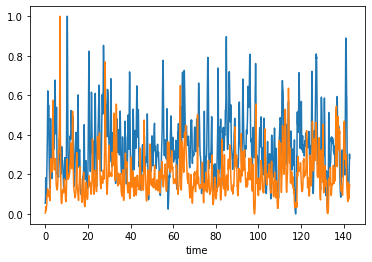

In [167]:
indicators_df['flow'].plot()
indicators_df['anxiety'].plot()

Вариант 2 - усреднение по попыткам. Как искать попытку?